# Chapter 08. 이미지를 위한 인공신경망

## 08-1. 합성곱 신경망의 구성 요소

> 용어 정리 <br>
그림을 마음에 드는게 없어서.. 유투브 강의 그림으로 대체, 일시정지 후 그림 보면서 설명할 것 <br>
https://www.youtube.com/watch?v=tPLRox0YYc8 <br>
> 1. 합성곱(Convolution) : 밀집층과 비슷하게 입력과 가중치를 곱하고 절편을 더하는 선형 계산. 하지만 밀집층과 달리 각 합성곱은 입력 전체가 아니라 일부만 사용하여 선형 계산을 수행 <br>
> 인공신경망은 가중치 w1~w10과 절편 b를 랜덤하게 초기화 후 에포크를 반복하면서 경사하강법 알고리즘을 사용ㅇ해서 손실이 낮아지도록 최적의 가중치와 절편을 찾아가지만<br>
> 합성곱은 입력 데이터에 전체에 적용하는 것이 아니라 일부에 가중치를 곱함 <br>
<br>
> 2. 합성곱의 필터 : 밀집층의 뉴런에 해당, 필터의 가중치와 절편을 커널이라고 부름, 자주 사용되는 커널의 크기는 (3,3) 또는 (5,5), 커널의 깊이는 입력의 깊이와 같음 <br>
> 뉴런 = 필터 = 커널 모두 같은 말이라 생각해도 좋다고 함.. <br>
> 커널의 크기는 하이퍼파라미터 <br>
<br>
> 3. 특성맵 : 합성곱의 층이나 풀링 층의 출력 배열을 의미, 필터 하나가 하나의 특성맵을 만듦, 합성곱 층에서 5개의 필터를 사용하면 5개의 특성맵이 만들어짐 <br>
> 합성곱의 출력 <br>
> 일반적으로 활성화 함수 적용 후의 값, 근데 이런 표현은 잘 쓰진 않음 <br>
<br>
> 4. 패딩 : 합성곱 층의 입력 주위에 추가한 0으로 채워진 픽셀, 패딩을 사용하지 않는 것은 valid 패딩, 합성곱 층의 출력 크기를 입력과 동일하게 만들기 위해 입력에 패딩을 추가하는 것을 same 패딩 <br>
> 패딩을 쓰는 이유 ? 잘 생각해보면.. 각 모서리에 있는 값들은 한번만 쓰이기 때문에. 모서리 값은 덜 중요한가? 그렇지가 않잖아... <br>
> 그래서 구석에 있는 친구들도 적절히 쓰여지기 위해서 사용하는 것이 패딩임.<br>
<br>
> 5. 스트라이드(Stride) : 합성곱 층에서 필터가 입력 위를 이동하는 크기, 보통 1픽셀 사용 <br>
> 필터가 이동하는 크기 <br>
<br>
> 6. 풀링(Pooling) : 가중치가 없고 특성맵의 가로세로 크기를 줄이는 역할, 최대 풀링과 평균 풀링이 있으며 (2,2) 풀링으로 입력을 절반으로 줄임 <br>\
> 최대 풀링(Max Pooling)은 영역 중 가장 큰 값을 선택 <br>
> 평균 풀링(Average Pooling)은 영역의 평균값을 계산하여 선택 <br>
> 최대 풀링을 많이 사용, 평균 풀링은 평균의 마법 때문에.. ^^; 잘 사용하지 않음<br>
> 풀링은 가로 세로만 진행, 특성맵의 개수는 변하지 않음 <br>
<br>
> 7. 렐루 함수(Relu Function) : 07-2 심층신경망에서 나왔던 함수 <br>
> 이미지 분류 모델의 은닉층에서 만힝 사용하는 활성화 함수 <br>
> 이진분류 - 시그모이드 함수 / 다중분류 - 소프트맥수 함수 사용했지만, 은닉층의 함수는 대표적으로 시그모이드 함수와 렐루 함수가 있었음 <br>
> 렐루함수는 입력이 양수일 경우, 그냥 입력... 입력이 음수일 경우 0 처리 <br>
<br>
> 8. TensorFlow Conv2D : 입력의 너비와 높이 방향의 합성곱 연산을 구현한 클래스 <br>
<br>
> 9. TensorFlow MaxPooling2D : 입력의 너비와 높이를 줄이는 풀링 연산을 구현한 클래스 <br>
<br>
> 10. plot_model() 메서드 : 케라스 모델 구조를 그리거나 파일로 저장 <br>
<br>


## 08-2 합성곱 신경망을 사용한 이미지 분류

> 이제 응용해보자.. Chapter07에서 실습했던 패션 MNIST로~ <br>
> 7장에서는 일렬로 펼쳤었음 reshape()나 Flatten 클래스로 .. <br>
> 근데, 합성곱 신경망은 2차원 이미지를 그대로 사용하기 때문에 일렬로 펼칠 필요가 없음 <br>
<br>
<br>
> 입력 이미지는 항상 깊이 차원이 있어야 하는데, 흑백이미지의 경우 2차원 배열이기 때문에 Conv2D 층을 사용하기 위해서 차원을 하나 더 추가해줌 <br>

In [7]:
# 데이터 set 불러오기
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

# Sequential 클래스 객체 만들기
model = keras.Sequential()

# 첫번째 합성곱 층인 Conv2D 추가
model.add(keras.layers.Conv2D(32,                   # 32개 필터
                            kernel_size=3,          # 커널의 크기 (3,3)
                            activation='relu',      # 활성화 함수 Relu
                            padding='same',         # same 패딩
                            input_shape=(28,28,1))) # MNIST 이미지

# 풀링 추가 및 (2,2) 풀링 적용 => 특성맵의 크기는 절반, 깊이는 변하지 않음
model.add(keras.layers.MaxPooling2D(2))
# 따라서.. 특성맵의 크기는 (14, 14, 32)


# 두번째 합성곱 - 풀링 층 추가
model.add(keras.layers.Conv2D(64,                   # 필터 개수 64만 변경
                            kernel_size=3,
                            activation='relu',
                            padding='same'))
model.add(keras.layers.MaxPooling2D(2))
# 특성맵의 크기는 (7, 7, 64)


# 3차원 특성맵을 일렬로 펼치자
# 하지만 그 전에... 중간에 밀집 은닉층을 하나 더 두자
# 이유는 마지마겡 10개의 뉴런을 가진 (밀집) 출력층에서 확률을 계산하기 위해서..

# Faltten 클래스
model.add(keras.layers.Flatten())
# Dense 은닉층, 100개의 뉴런 사용
model.add(keras.layers.Dense(100, activation='relu'))
# 은닉층의 과대적합을 막아 성능을 개선
model.add(keras.layers.Dropout(0.4))
# Dense 출력층, 다중분류이므로 softmax 사용
model.add(keras.layers.Dense(10, activation='softmax'))


# 모델 구조 출력
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 3136)              0         
                                                                 
 dense_2 (Dense)             (None, 100)              

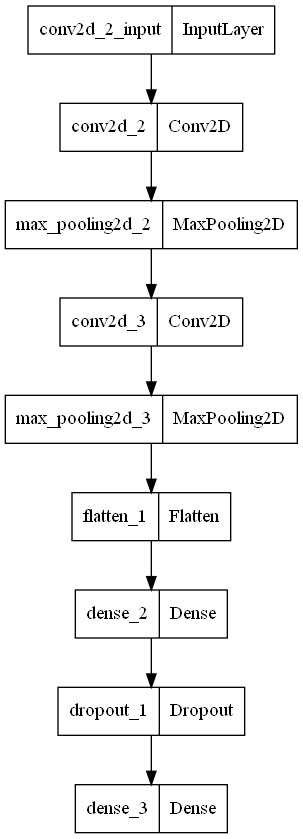

In [9]:

# 그림으로 표현해주는 plot_model 함수 사용해보기
keras.utils.plot_model(model)

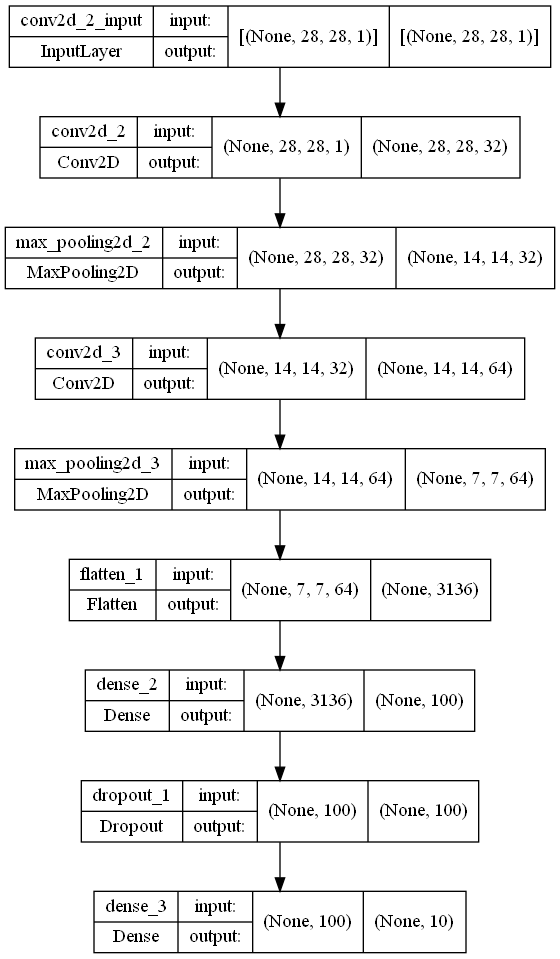

In [10]:
# plot_model() 함수에 show_shapes 매개변수를 true로 하면.. 입력/출력 크기 표시해줌
keras.utils.plot_model(model, show_shapes=True)

In [11]:
# 모델 컴파일과 훈련
# 케라스 API
# Adam 옵티마이저 사용, ModelCheckpoint와 EarlyStopping 콜백 사용으로 "조기종료" 기법 구현
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)        # restore_begst_weight 지정으로 최적의 모델 파라미터로 복원되어 다시 읽을필요 없음
history = model.fit(train_scaled, train_target, epochs=20,
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])


Epoch 1/20
1500/1500 [==============================] - 20s 13ms/step - loss: 0.5286 - accuracy: 0.8125 - val_loss: 0.3364 - val_accuracy: 0.8771
Epoch 2/20
1500/1500 [==============================] - 20s 13ms/step - loss: 0.3531 - accuracy: 0.8734 - val_loss: 0.2808 - val_accuracy: 0.8971
Epoch 3/20
1500/1500 [==============================] - 20s 14ms/step - loss: 0.3040 - accuracy: 0.8915 - val_loss: 0.2610 - val_accuracy: 0.9007
Epoch 4/20
1500/1500 [==============================] - 20s 13ms/step - loss: 0.2722 - accuracy: 0.9017 - val_loss: 0.2463 - val_accuracy: 0.9100
Epoch 5/20
1500/1500 [==============================] - 20s 13ms/step - loss: 0.2472 - accuracy: 0.9102 - val_loss: 0.2267 - val_accuracy: 0.9141
Epoch 6/20
1500/1500 [==============================] - 20s 13ms/step - loss: 0.2282 - accuracy: 0.9161 - val_loss: 0.2264 - val_accuracy: 0.9188
Epoch 7/20
1500/1500 [==============================] - 20s 13ms/step - loss: 0.2105 - accuracy: 0.9234 - val_loss: 0.2301 -

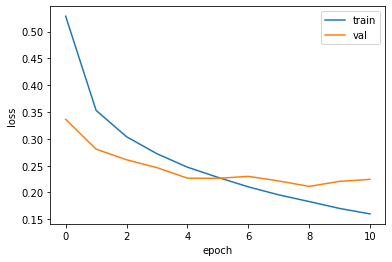

In [12]:
# 손실 그래프 그려서 조기종료가 잘 되었는지 확인해보기
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [13]:
# 위는 9번째가 가장 best

# 평가
model.evaluate(val_scaled, val_target)

# 9번째 에포크와 동일

375/375 [==============================] - 1s 4ms/step - loss: 0.2114 - accuracy: 0.9225


[0.2114090770483017, 0.9225000143051147]

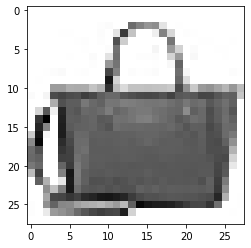

In [14]:
# predict() 메서드를 사용해서 새로운 데이터에 대한 예측 해보기
# 흑백 이미지의 깊이 차원은 없으므로 (28, 28, 1)의 크기를 (28, 28)로 바꾸어 출력해야함

plt.imshow(val_scaled[0].reshape(28, 28), cmap='gray_r')
plt.show()

In [15]:
# 10개의 클래스에 대한 예측 확률 출력
preds = model.predict(val_scaled[0:1])
print(preds)

# 9번째 값이 1.0000000e+00 임

[[7.5629474e-17 3.0810724e-24 2.8968689e-20 2.8531365e-17 6.3602645e-17
  2.1988022e-18 3.3324622e-17 3.6213195e-15 1.0000000e+00 2.6668419e-17]]


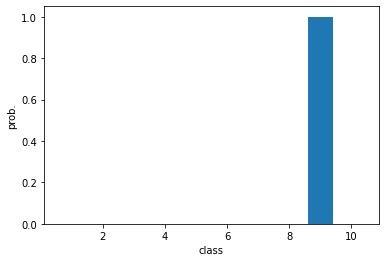

In [16]:
plt.bar(range(1, 11), preds[0])
plt.xlabel('class')
plt.ylabel('prob.')
plt.show()

# 나머지는 0, 9번째만 1

In [17]:
classes = ['티셔츠', '바지', '스웨터', '드레스', '코트', '샌달', '셔츠', '스티커즈', '가방', '앵클부츠']

import numpy as np
print(classes[np.argmax(preds)])

# 9번째는 가방~

가방


In [18]:
# 픽셀값의 범위를 0~1로 바꾸고, 이미지 크기를 (28, 28)에서 (28,28,1)로 바꾸자
test_scaled = test_input.reshape(-1, 28, 28, 1) / 255.0

# 테스트 데이터에 대한 성능 측정
model.evaluate(test_scaled, test_target)

313/313 [==============================] - 1s 4ms/step - loss: 0.2371 - accuracy: 0.9145


[0.2370958924293518, 0.9144999980926514]

## 08-3. 합성곱 신경망의 시각화

> 가중치 시각화 : 그림이 있는 부분은 가중치가 크게 활성화, 그렇지 않은 영역에서는 낮은 값

In [19]:
from tensorflow import keras
model = keras.models.load_model('best-cnn-model.h5')

# keras 모델에 추가한 층 확인
model.layers

# Conv2D 2번, MaxPooling2D 2번

In [21]:
# 첫번째 합성곱의 가중치
# 층의 가중치와 절편은 층의 weight 속성에 저장되어 있음
conv = model.layers[0]
print(conv.weights[0].shape, conv.weights[1].shape)

# 앞에서 커널의 크기를 (3,3)으로 지정했고, 입력되는 깊이는 1
# 필터의 개수 32였지..

#  뒤에 (32,)는 절편 b를 의미함

(3, 3, 1, 32) (32,)


In [22]:
conv_weights = conv.weights[0].numpy()
print(conv_weights.mean(), conv_weights.std())

# 가중치의 평균값은 0에 가깝고 표준 편차는 0.26정도

-0.02892582 0.25853622


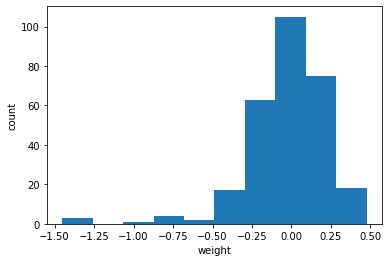

In [24]:
import matplotlib.pyplot as plt
plt.hist(conv_weights.reshape(-1, 1)) # 히스토그램을 그리기 위한 1차원 배열 변환
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

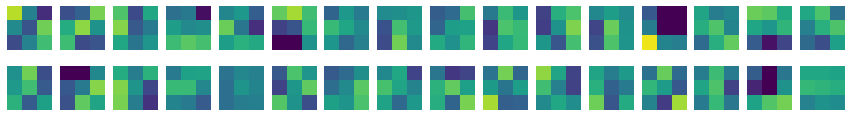

In [25]:
# 32개의 커널을 16개씩 두줄에 출력해보기
fig, axs = plt.subplots(2, 16, figsize=(15,2))
for i in range(2):
    for j in range(16):
        axs[i, j].imshow(conv_weights[:,:,0,i*16 + j], vmin=-0.5, vmax=0.5)     # imshow() 함수는 배열에 있는 최대값과 최소값을 사용해 픽셀의 강도를 표현
        axs[i, j].axis('off')                                                   # 그 배열의 최대값이면 가장 밝은 노란색으로 표시
        
plt.show()

In [26]:
# 훈련하지 않은 빈 합성곱 신경망을 통해 위 그림과 비교하기
no_training_model = keras.Sequential()
no_training_model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28,28,1)))

no_training_conv = no_training_model.layers[0]
print(no_training_conv.weights[0].shape)

(3, 3, 1, 32)


In [27]:
no_training_weights = no_training_conv.weights[0].numpy()
print(no_training_weights.mean(), no_training_weights.std())

# 평균 0에 가깝고, 표준 편차도 매우 적다

-0.005513635 0.08070492


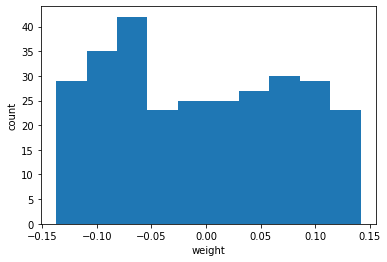

In [28]:
# 히스토그램
plt.hist(no_training_weights.reshape(-1, 1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

# 비교적 고른 분포를 보임, tensorflow가 신경망의 가중치를 처음 초기화할 때 균등분포에서 랜덤하게 값을 선택하기 때문임

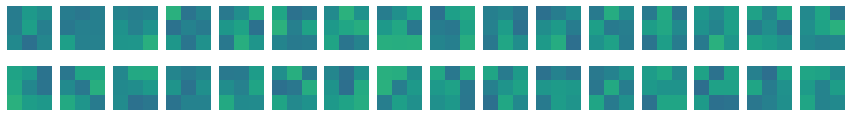

In [29]:
# imshow()로 확인해보기
fig, axs = plt.subplots(2, 16, figsize=(15,2))
for i in range(2):
    for j in range(16):
        axs[i, j].imshow(no_training_weights[:,:,0,i*16 + j], vmin=-0.5, vmax=0.5)     # imshow() 함수는 배열에 있는 최대값과 최소값을 사용해 픽셀의 강도를 표현
        axs[i, j].axis('off')                                                   # 그 배열의 최대값이면 가장 밝은 노란색으로 표시
        
plt.show()

# 밝은 노란색이 보이질 않는다.
# 결국 합성곱 신경망이 잘 학습되어 있다는 것을 알 수 있음.

> 함수형 API : 입력이 2개일 수 있고, 출력도 2개일 수 있지요? 이럴 때는 Sequential 클래스를 사용하기 어려워 함수형 API를 사용한다.

In [30]:
# 함수형 API로 7장에서 만들었던 Dense 층 만들어보기
# dense1 = keras.layers.Dense(100, activation='sigmoid')
# dense2 = keras.layers.Dense(10, activation='softmax')
# Sequential 클래스 객체의 add()로 전달할 수 있으나, 다음과 같이 함수처럼 호출할 수도 있음
# hidden = dense1(inputs) # 첫번째 층
# outputs = dense2(hidden) # 두번째 층, 두번째 층은 첫번째 층의 출력을 입력으로 사용
# model = keras.Model(inputs, outputs)

# 케라스는 InputLayer 클래스 객체를 쉽게 다룰 수 있도록 Input() 함수를 별도로 제공
# inputs = keras.Input(shape=(784,))

# 케라스 모델의 input 속성으로 입력을 확인할 수 있음
print(model.input)

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='conv2d_2_input'), name='conv2d_2_input', description="created by layer 'conv2d_2_input'")


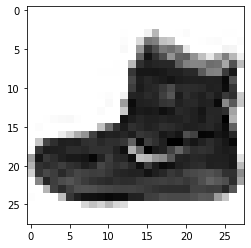

In [32]:
# input과 첫번째 층 output을 연결해서 conv_acti 모델을 만듦
conv_acti = keras.Model(model.input, model.layers[0].output)

# 특성맵 시각화
# 첫번째 샘플
# import matplotlib.pyplot as plt
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
plt.imshow(train_input[0], cmap='gray_r')
plt.show()

In [33]:
# predict() 메서드는 항상 입력의 첫번째 차원이 배치 차원일 것으로 기대하므로 꼭 차원을 유지해서 전달해야 함
inputs = train_input[0:1].reshape(-1, 28, 28, 1) / 255.0
feature_maps = conv_acti.predict(inputs)

print(feature_maps.shape)

# 첫번째 차원은 배치 차원
# 세임패딩과 32개의 필터를 사용한 합성 곱의 출력이므로 28,28,32가 됨

(1, 28, 28, 32)


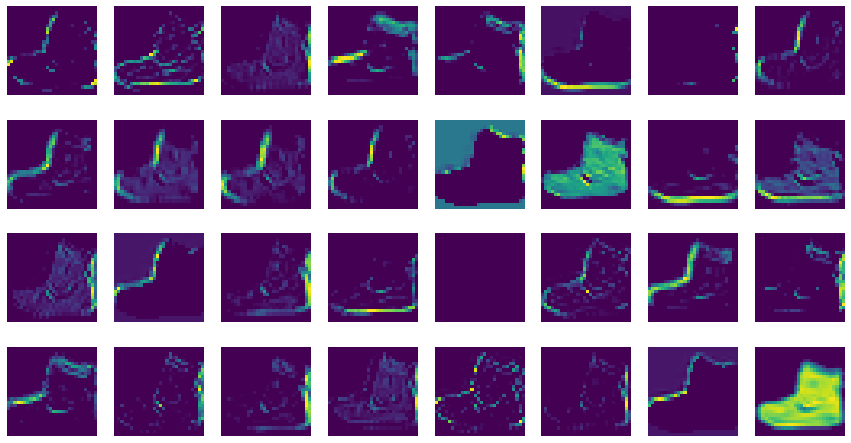

In [34]:
# imshow()로 확인해보기
fig, axs = plt.subplots(4, 8, figsize=(15,8)) # 32개의 특성맵이 있으므로 4개의 행으로 나누어 그려보자
for i in range(4):
    for j in range(8):
        axs[i, j].imshow(feature_maps[0,:,:,i*8 + j])
        axs[i, j].axis('off')                        
        
plt.show()

In [35]:
# 두번째 합성곱
conv2_acti = keras.Model(model.input, model.layers[2].output)

inputs = train_input[0:1].reshape(-1, 28, 28, 1) / 255.0
feature_maps = conv2_acti.predict(inputs)

print(feature_maps.shape)

# 첫번째 풀링층에서 가로,세로 절반으로 줄였고, 필터 개수 64개였으니 14,14,64

(1, 14, 14, 64)


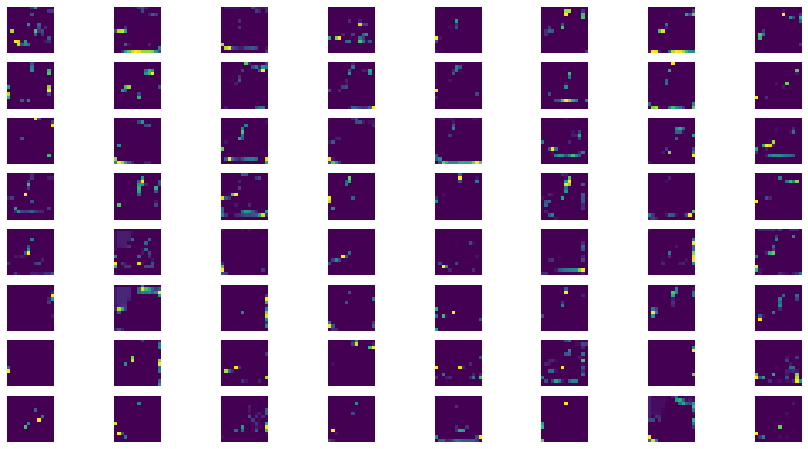

In [36]:
# imshow()로 확인해보기
fig, axs = plt.subplots(8, 8, figsize=(15,8)) # 32개의 특성맵이 있으므로 4개의 행으로 나누어 그려보자
for i in range(8):
    for j in range(8):
        axs[i, j].imshow(feature_maps[0,:,:,i*8 + j])
        axs[i, j].axis('off')                        
        
plt.show()

> 위 그림은 이해하기 어렵다... <br>
> 두번째 합성곱 층의 필터 크기는 (3,3,32) <br>
> 두번째 합성곱 층의 첫번째 필터가 앞서 출력한 32개의 특성 맵과 곱해져.. 두번째 합성곱층의 첫번째 특성 맵이 됨. <br>
> 합성곱의 층이 많이 쌓일수록 앞 층은 시각적인 정보를 바탕으로 학습 <br>
> 뒤 층은 추상적인 정보를 학습 <br>
> 즉, 합성곱 신경망이 시각적인 정보와 추상적인 정보를 통해 10개의 클래스를 찾을 수 있는 것 <br>